## Flight Price Prediction

#### INTRODUCTION
The objective of the study is to analyze the flight booking dataset obtained from the “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

#### Columns
Airline - Name of the Airlines<br>
Date_of_Journey - Date of Flight<br>
Source - Departure Destination<br>
Destination - Arrival Destination<br>
Route - The route of the Flight<br>
Dep_Time - Departure Time<br>
Arrival_Time - Arrival Time<br>
Duration - Duration of the Journey<br>
Total_Stops - Number of Stops During the Journey<br>
Price - Price of the Flight<br>

In [1]:
# Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Algorithmes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

### Loading and Exploring the Data

In [3]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train_df.shape

(10683, 11)

In [6]:
test_df.shape

(2671, 10)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
#missing values
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
# drop missing values
train_df.dropna(inplace=True)

In [11]:
#missing values
test_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [12]:
# check for duplication in train data
train_df.duplicated().sum()

220

In [13]:
# drop duplication in train data
train_df.drop_duplicates(inplace=True)

In [14]:
# check for duplication in test data
test_df.duplicated().sum()

26

In [15]:
# drop duplication in test data
test_df.drop_duplicates(inplace=True)

In [16]:
# concat train_df,test_df
df=pd.concat([train_df,test_df],ignore_index=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [17]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13102,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13103,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13104,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13105,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13106,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


#### Here We can see that the price coloumn at the end does not have any value which is because the Test Data does not have the Price column.

In [18]:
df.Additional_Info.value_counts()

No info                         10308
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [20]:
# map string values in the total stops column into integer values
dic={'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4}

df['Total_Stops']=df['Total_Stops'].map(dic)
df['Total_Stops'].value_counts()

1    7052
0    4321
2    1678
3      54
4       2
Name: Total_Stops, dtype: int64

In [21]:
#convert column Date_of_Journey from string type to datetime
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [22]:
# create a column for the month
df['month']=df['Date_of_Journey'].dt.month.astype(str)
# the month type is integer but the month not quantitive value so I convert it to string 
df['day']=df['Date_of_Journey'].dt.day.astype(str)
# the month type is integer but the month not quantitive value so I convert it to string 

In [23]:
df['Duration_hour']=df['Duration'].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split('h').str[1].replace(['m'],'')
df['Duration_min']=df['Duration_min'].str[:-1]

In [24]:
# those two rows make an error when I want to convert them to integer so I will drop it 
df[df['Duration_hour']=='5m']  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_min
6397,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327.0,6,3,5m,NaN
13096,Air India,2019-12-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,NaN,12,3,5m,NaN


#### We will drop these records as the duration can't be 5 min

In [25]:
df.drop(df[df['Duration_hour']=='5m'].index,inplace=True)

In [26]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [27]:
df['Duration_min'].replace('',np.nan,inplace=True)
df['Duration_min'].fillna(0,inplace=True)
df['Duration_min']=df['Duration_min'].astype(int)

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,3,24,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,4,45


#### Converting the Duration hours mins to minutes.

In [29]:
def convert_to_minutes(h):
    if h>12:
        return (h-12)*60
    else:
        return h*60
    
df['Duration_hour']=df['Duration_hour'].apply(convert_to_minutes)
df['Duration_min']=df['Duration_hour']+df['Duration_min']
df.drop(columns=['Duration_hour','Duration'],inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,month,day,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897.0,3,24,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662.0,1,5,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882.0,9,6,420
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218.0,12,5,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302.0,1,3,285


# EDA (Exploratory Data Analysis)

#### First Date for the Data

In [30]:
df['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

#### Last Date for the Data

In [31]:
df['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

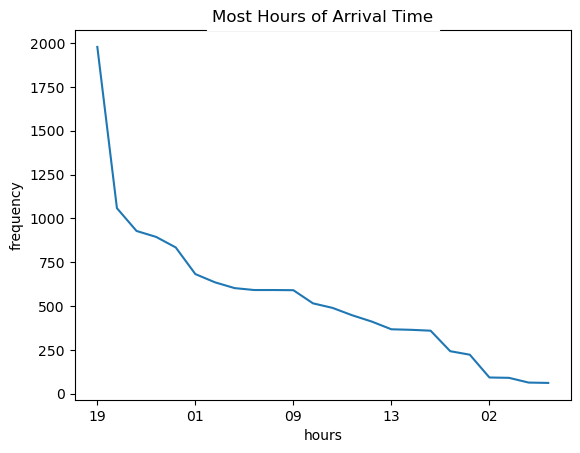

In [32]:
df['Arrival_Time'].str[:2].value_counts().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("Most Hours of Arrival Time",
          backgroundcolor='white',);

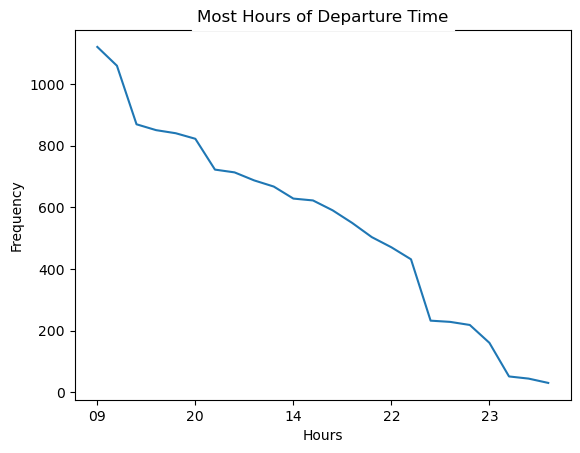

In [33]:
df['Dep_Time'].str[:2].value_counts().plot(kind='line')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Most Hours of Departure Time",
          backgroundcolor='white');

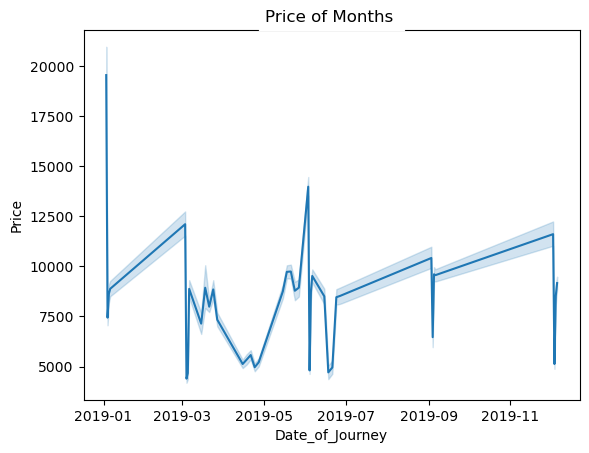

In [34]:
sns.lineplot(x='Date_of_Journey',y='Price',data=df[df['Price']!=np.nan],palette='crest')
plt.title("Price of Months ",
          backgroundcolor='white');

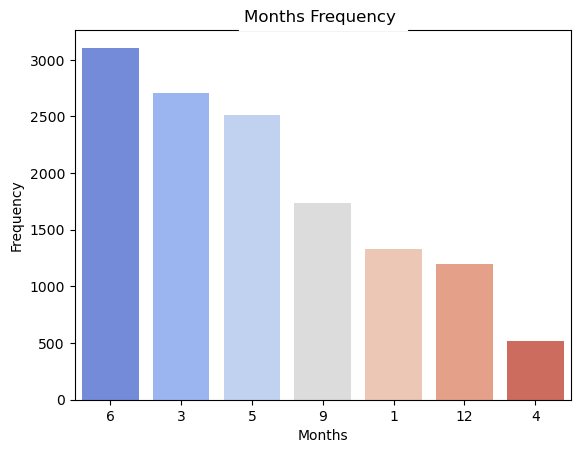

In [35]:
chart=sns.countplot(x='month',data=df,palette='coolwarm', order = df['month'].value_counts().index)
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title("Months Frequency ",backgroundcolor='white')
chart.set_xticklabels(chart.get_xticklabels(),rotation=360);

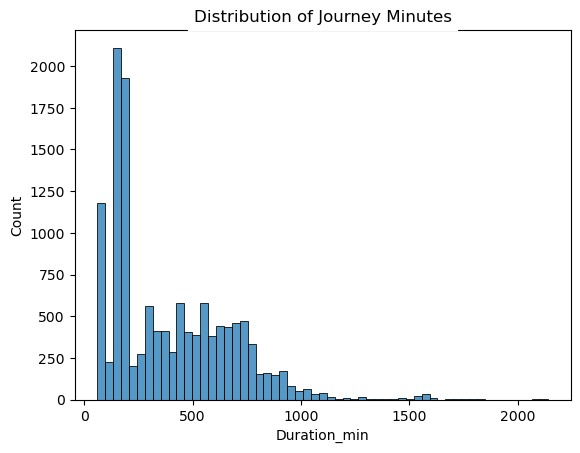

In [36]:
sns.histplot(x='Duration_min',data=df,palette='crest')
plt.title("Distribution of Journey Minutes",
          backgroundcolor='white');

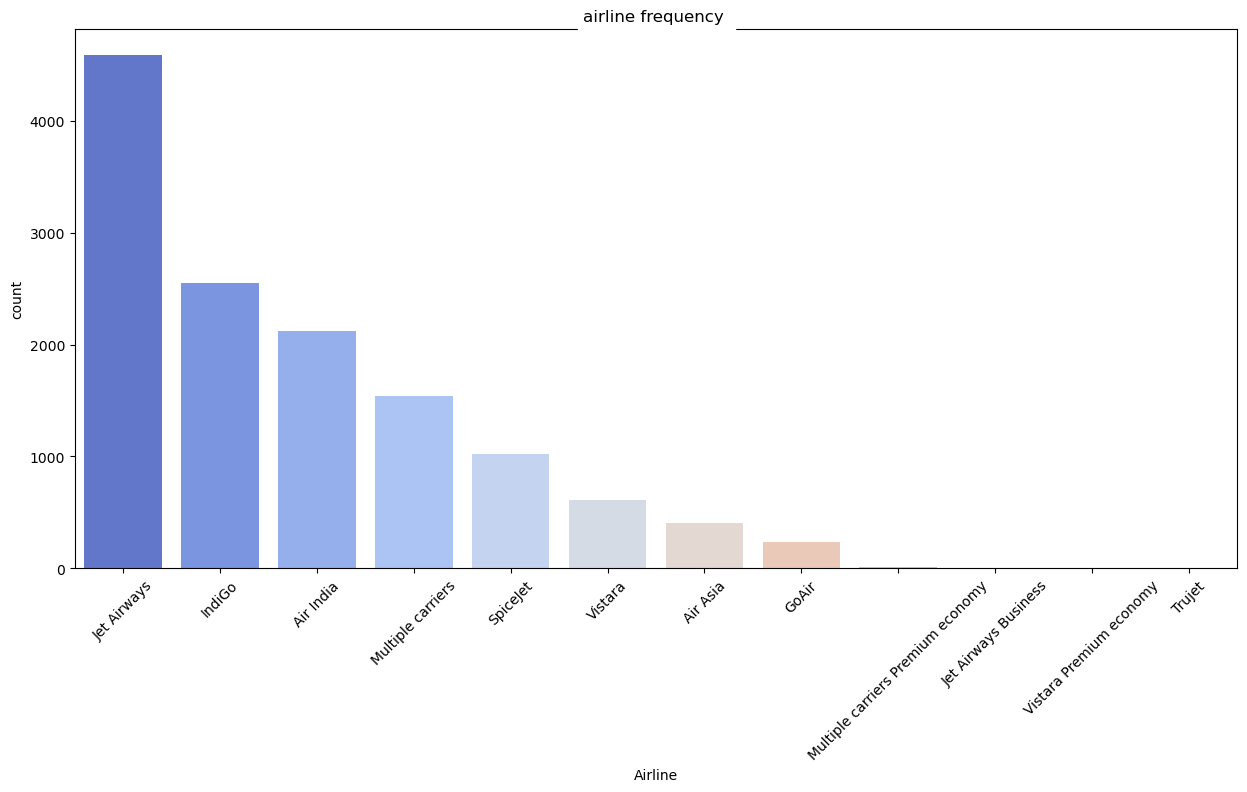

In [37]:
plt.figure(figsize=(15,7))
chart=sns.countplot(x='Airline',data=df,palette='coolwarm', order = df['Airline'].value_counts().index)
plt.title("airline frequency ",backgroundcolor='white')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45);

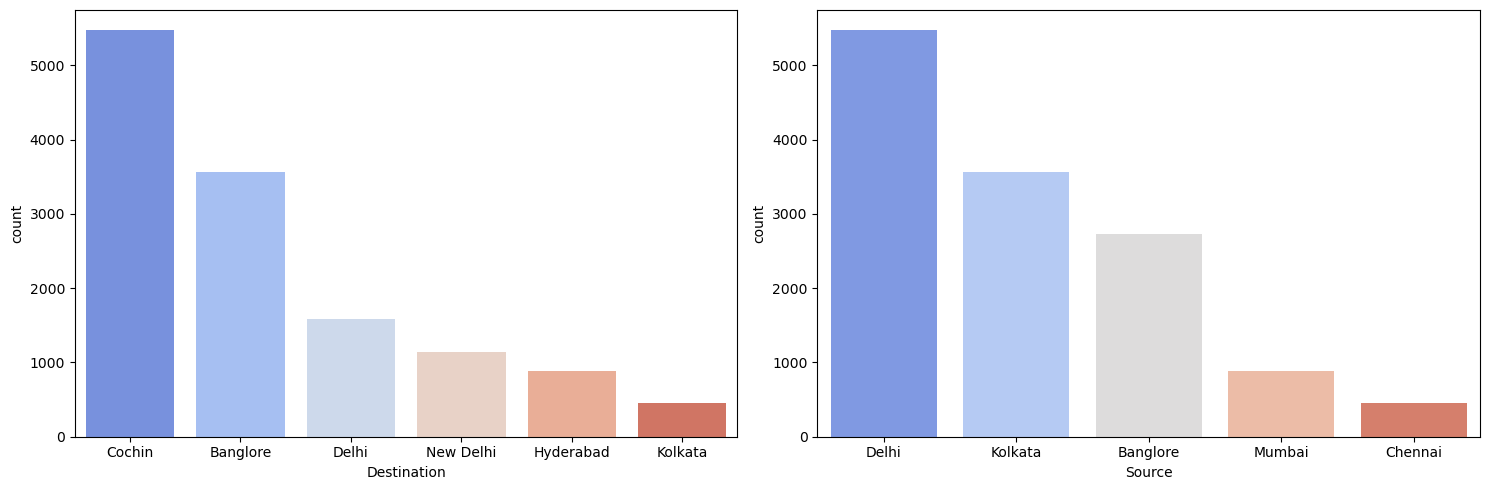

In [38]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
sns.countplot(x='Destination',data=df,palette='coolwarm', order = df['Destination'].value_counts().index,ax=ax[0])
sns.countplot(x='Source',data=df,palette='coolwarm', order = df['Source'].value_counts().index,ax=ax[1])

plt.tight_layout();

##### Cochin is the most destination from others

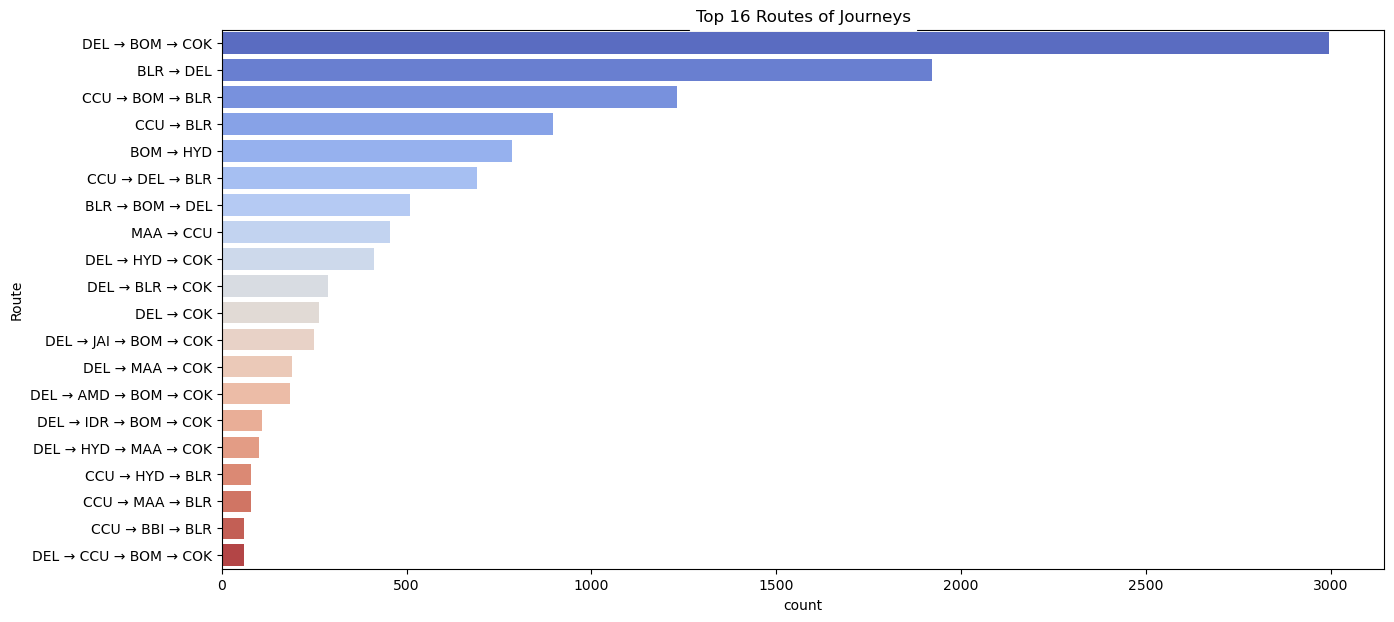

In [39]:
plt.figure(figsize=(15,7))
chart=sns.countplot(y='Route',data=df,palette='coolwarm', order = df['Route'].value_counts()[:20].index)
plt.title("Top 16 Routes of Journeys", backgroundcolor='white');

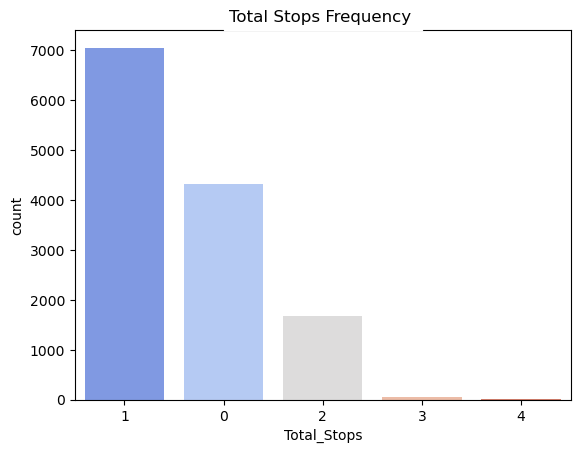

In [40]:
sns.countplot(x='Total_Stops',data=df,palette='coolwarm', order = df['Total_Stops'].value_counts().index)
plt.title("Total Stops Frequency ",backgroundcolor='white');

##### most journeys take one stop during the journey

# Modeling

In [41]:
#add column Len_Route insted of Route 
df['Len_Route']=df['Route'].apply(lambda i :len(i))
df.drop(columns=['Route'],inplace=True)

In [42]:
# drop columns Date_of_Journey,Dep_Time and Arrival_Time
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

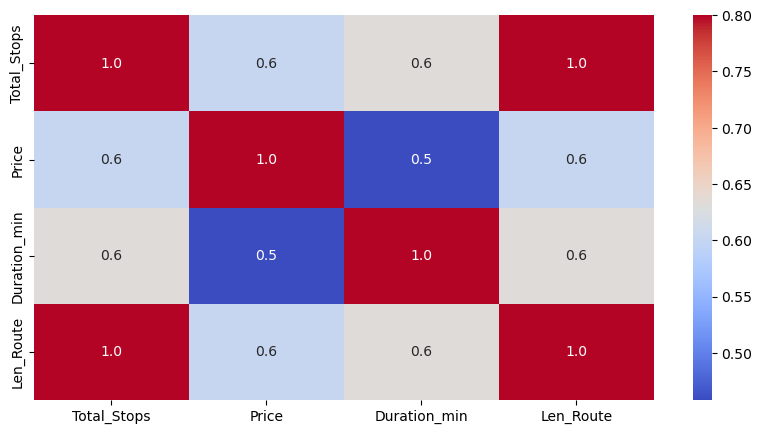

In [43]:
plt.figure(figsize=(10,5))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,vmax=0.8,cmap='coolwarm',annot=True,fmt='.1f',linecolor='white',cbar=True);

In [44]:
df.corr()['Price']

Total_Stops     0.601889
Price           1.000000
Duration_min    0.457916
Len_Route       0.601889
Name: Price, dtype: float64

In [45]:
#Convert categorical variable into dummy/indicator variables
df=pd.get_dummies(df)

In [46]:
df.head()

,Total_Stops,Price,Duration_min,Len_Route,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,month_9,day_15,day_18,day_21,day_24,day_27,day_3,day_4,day_5,day_6
0,0,3897.0,170,9,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,7662.0,445,21,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,13882.0,420,21,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,6218.0,325,15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,13302.0,285,15,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
data=df[~(df['Price'].isna())]
data.tail()

,Total_Stops,Price,Duration_min,Len_Route,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,month_9,day_15,day_18,day_21,day_24,day_27,day_3,day_4,day_5,day_6
10457,0,4107.0,150,9,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
10458,0,4145.0,155,9,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10459,0,7229.0,180,9,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10460,0,12648.0,160,9,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10461,2,11753.0,500,21,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [48]:
finalt_test_data=df[df['Price'].isna()]
finalt_test_data=finalt_test_data.drop(columns=['Price'])
finalt_test_data.head()

,Total_Stops,Duration_min,Len_Route,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,month_9,day_15,day_18,day_21,day_24,day_27,day_3,day_4,day_5,day_6
10462,1,655,15,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10463,1,240,15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10464,1,705,15,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10465,1,60,15,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10466,0,170,9,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
X=data.drop(columns=['Price'])
y=data['Price']
X.shape,y.shape

((10461, 52), (10461,))

In [71]:
RF = RandomForestRegressor(random_state=101)

# Fit the model to the data
RF.fit(X, y)

# Get the feature importances
importances = RF.feature_importances_
feature_names = X.columns


# Creating a dataframe for visualization
final_df = pd.DataFrame({'Features':feature_names,"Importances":importances})
final_df.set_index('Features',inplace=True)
sorted_importances = final_df.sort_values(by = 'Importances')
sorted_importances
#sorted_importances.plot(kind='barh')
#plt.figure(figsize=(30,12))
#plt.show()

,Importances
Features,
Additional_Info_No check-in baggage included,0.000015
Additional_Info_Red-eye flight,0.000033
Airline_Vistara Premium economy,0.000069
Additional_Info_No Info,0.000112
Airline_Trujet,0.000210
Additional_Info_Change airports,0.000231
Additional_Info_2 Long layover,0.000254
Additional_Info_1 Long layover,0.000259
Additional_Info_1 Short layover,0.000367


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24, shuffle =True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7322, 52), (3139, 52), (7322,), (3139,))

In [52]:
CV = []
train_scores = []
test_scores = []

def pred_model(model):
    # Training model
    model.fit(X_train,y_train)
            
    # score of train set
    train_model_score = model.score(X_train,y_train)
    train_scores.append(round(train_model_score,2))
    y_pred_train=model.predict(X_train)
    
    # score of test set
    test_model_score = model.score(X_test,y_test)
    test_scores.append(round(test_model_score,2))
    y_pred_test=model.predict(X_test)
    
    # train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train score :",round(train_model_score,2))
    print("Test score :",round(test_model_score,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Mean absolute error for train :",mean_absolute_error(y_train,y_pred_train))
    print("Median absolute error for train :",median_absolute_error(y_train,y_pred_train))
    print("Mean absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    print("Median absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train[:100]-y_pred_train[:100]),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test[:100], y = y_pred_test[:100])
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Standard Linear Regression or Ordinary Least Squares

Train score : 0.76
Test score : 0.73
Train CV scores : [0.76209019 0.77514673 0.78213789 0.75058828 0.68659586]
Train CV mean : 0.75
Mean absolute error for train : 1552.8292464476726
Median absolute error for train : 1144.288644056911
Mean absolute error for test : 1619.5620116670186
Median absolute error for test : 1619.5620116670186


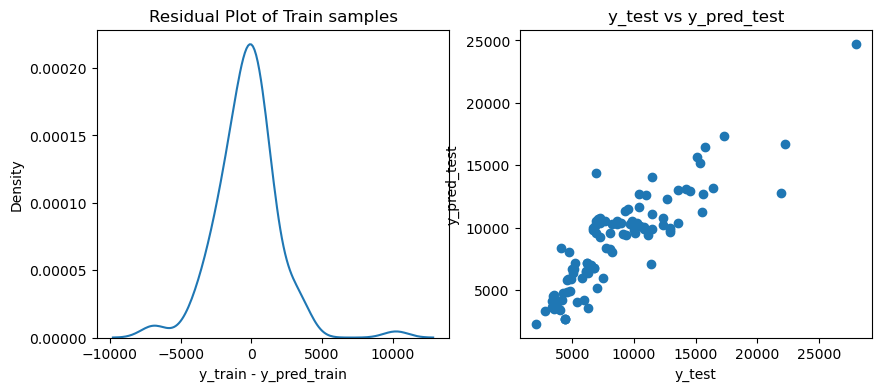

In [53]:
lr = LinearRegression()
pred_model(lr)

#### Random Forest

Train score : 0.97
Test score : 0.83
Train CV scores : [0.84462429 0.84710328 0.84366052 0.87468559 0.78439773]
Train CV mean : 0.84
Mean absolute error for train : 415.83230667427574
Median absolute error for train : 180.16750000000002
Mean absolute error for test : 965.7136802465249
Median absolute error for test : 965.7136802465249


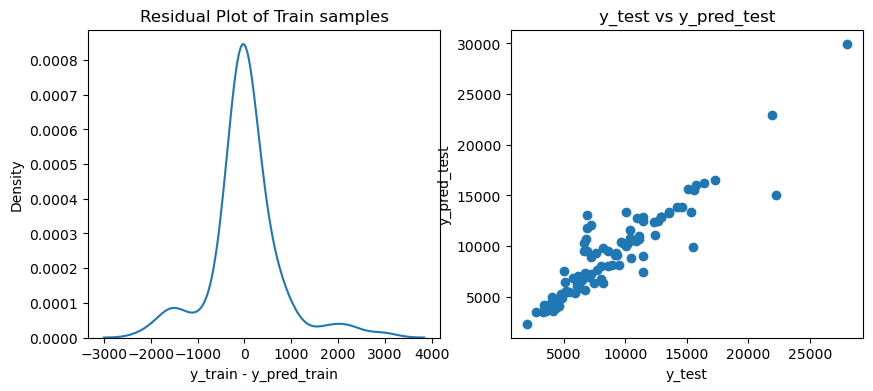

In [54]:
RF = RandomForestRegressor()
pred_model(RF)

#### Decision Tree 

Train score : 0.98
Test score : 0.76
Train CV scores : [0.75695856 0.6626055  0.81512417 0.82195498 0.6930509 ]
Train CV mean : 0.75
Mean absolute error for train : 165.3841391241009
Median absolute error for train : 0.0
Mean absolute error for test : 1065.4229213125197
Median absolute error for test : 1065.4229213125197


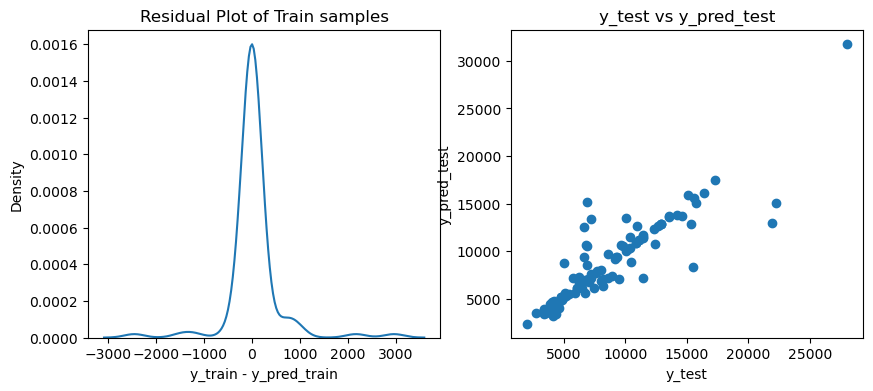

In [55]:
DTR = DecisionTreeRegressor()
pred_model(DTR)

### Finding best parameter for random forest as it gave us the highest accuracy

In [62]:
parameters = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
              }

In [63]:
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = parameters,cv=5,random_state = 101)

In [64]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=7,
                                                   min_samples_split=8,
                                                   n_estimators=400),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=101)

In [65]:
RF_model.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 40}

Train score : 0.85
Test score : 0.81
Train CV scores : [0.82954222 0.83385917 0.81655534 0.83458904 0.76311123]
Train CV mean : 0.82
Mean absolute error for train : 1139.0509957461368
Median absolute error for train : 711.6942590635626
Mean absolute error for test : 1228.5424680206584
Median absolute error for test : 1228.5424680206584


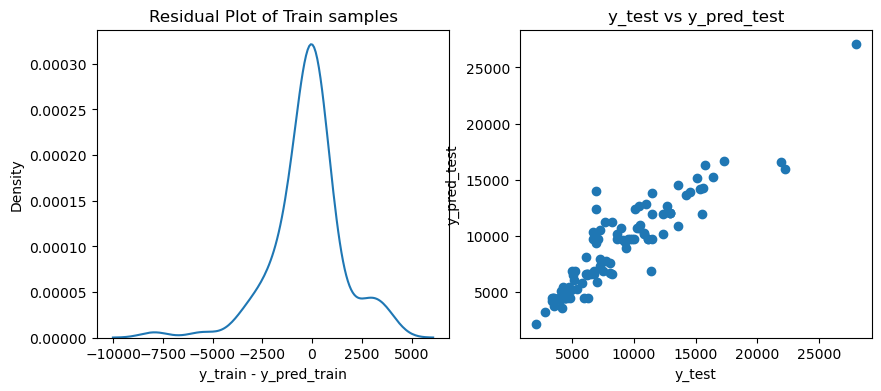

In [66]:
RF = RandomForestRegressor(max_depth=7,min_samples_split=8,n_estimators=400,min_samples_leaf=1)
pred_model(RF)

In [61]:
Technique = ["LinearRegression","RandomForestRegressor","RandomForestRegressor-Best_para","DecisionTreeRegressor"]
results=pd.DataFrame({'Model': Technique,'Accuracy(Train)': train_scores,'Accuracy(Test)': test_scores,
                      'CV score mean(Train)': CV})
display(results)

,Model,Accuracy(Train),Accuracy(Test),CV score mean(Train)
0,LinearRegression,0.76,0.73,0.75
1,RandomForestRegressor,0.97,0.83,0.84
2,RandomForestRegressor-Best_para,0.98,0.76,0.75
3,DecisionTreeRegressor,0.85,0.81,0.82


In [90]:
finalt_test_data.head()

,Total_Stops,Duration_min,Len_Route,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,day_15,day_18,day_21,day_24,day_27,day_3,day_4,day_5,day_6,Predicted_Price
10462,1,655,15,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,15150.370025
10463,1,240,15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4273.068876
10464,1,705,15,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,12817.814477
10465,1,60,15,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,10886.830110
10466,0,170,9,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4153.404406


In [62]:
Prdicted_Price=RF.predict(finalt_test_data)
Prdicted_Price[:5]

array([15150.37002523,  4273.06887618, 12817.81447713, 10886.83010989,
        4153.40440604])